In [2]:
from commons import *

In [3]:
dfParamEffects = pd.read_csv("data/metalearner_parametereffects.csv")
dfMetaRuntimes = pd.read_csv("data/rawruntimes/runtimes_metalearners_parametrized.csv", delimiter=";")
dfMetaRuntimesClean = dfMetaRuntimes[dfMetaRuntimes["exception"].isnull()]
dfMetaRuntimesClean = dfMetaRuntimesClean.merge(pd.read_csv("data/datasets.csv"), on="openmlid")
dfMetaRuntimesClean["applicationsize"] = dfMetaRuntimesClean["numinstances"] - dfMetaRuntimesClean["trainpoints"]
dfMetaRuntimesClean
#dfBaseRuntimes = pd.read_csv("data/runtimes/runtimes_atomic_nooutliers.csv")

,experiment_id,openmlid,trainpoints,seed,algorithm,algorithmoptions,baselearner,fittime,applicationtime,exception,name,numinstances,numattributes,numattributesafterbinarization,applicationsize
0,1,3,1000,0,adaboostm1,-P 70 -I 50,weka.classifiers.bayes.BayesNet,2.0,0.0,NaN,Kr-vs-kp,3196,36,40,2196
1,2,3,1000,1,adaboostm1,-P 70 -I 50,weka.classifiers.bayes.BayesNet,1.0,1.0,NaN,Kr-vs-kp,3196,36,40,2196
2,3,3,1000,0,adaboostm1,-P 70 -I 50,weka.classifiers.trees.DecisionStump,1.0,1.0,NaN,Kr-vs-kp,3196,36,40,2196
3,4,3,1000,0,adaboostm1,-P 95 -I 20,weka.classifiers.bayes.BayesNet,2.0,0.0,NaN,Kr-vs-kp,3196,36,40,2196
4,8,3,1000,1,adaboostm1,-P 70 -I 50,weka.classifiers.trees.DecisionStump,1.0,0.0,NaN,Kr-vs-kp,3196,36,40,2196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43900,14540,24,1000,0,randomsubspace,-P 80 -I 5,weka.classifiers.functions.SMO,1.0,1.0,NaN,NaN,8124,22,121,7124
43901,14550,24,1000,1,randomsubspace,-P 80 -I 5,weka.classifiers.functions.SMO,1.0,0.0,NaN,NaN,8124,22,121,7124
43902,14551,24,1000,1,randomsubspace,-P 90 -I 5,weka.classifiers.trees.REPTree,1.0,0.0,NaN,NaN,8124,22,121,7124
43903,14552,24,1000,0,randomsubspace,-P 90 -I 5,weka.classifiers.functions.SMO,1.0,0.0,NaN,NaN,8124,22,121,7124


In [9]:
metalearners = list(pd.unique(dfMetaRuntimes["algorithm"]))
metalearners.remove("lwl")
baselearners = classifiers
datasets = pd.unique(dfMetaRuntimes["openmlid"])

In [10]:
algoshortcuts = {
    'adaboostm1': "ab",
    'bagging': "bag",
    'logitboost': "lb",
    'lwl': "lwl",
    'randomcommittee': "rc",
    'randomsubspace': "rss"
}

# 0. Merge and Aggregate Informations of sub-learners into one Archive

In [7]:
dfAddInfo = pd.read_csv("data/rawruntimes/additional_information_metalearners_parametrized.csv", delimiter=";")
dfAddInfo["traintime_training"] = np.maximum(0, dfAddInfo["lastBuildClassifierTimestamp_training"] - dfAddInfo["firstBuildClassifierTimestamp_training"])
dfAddInfo["disttime_training"] = np.maximum(0, dfAddInfo["lastDistributionTimestamp_training"] - dfAddInfo["firstDistributionTimestamp_training"])
dfAddInfo["classifytime_training"] = np.maximum(0, dfAddInfo["lastClassifyInstanceTimestamp_training"] - dfAddInfo["firstClassifyInstanceTimestamp_training"])
dfAddInfo["traintime_prediction"] = np.maximum(0, dfAddInfo["lastBuildClassifierTimestamp_prediction"] - dfAddInfo["firstBuildClassifierTimestamp_prediction"])
dfAddInfo["disttime_prediction"] = np.maximum(0, dfAddInfo["lastDistributionTimestamp_prediction"] - dfAddInfo["firstDistributionTimestamp_prediction"])
dfAddInfo["classifytime_prediction"] = np.maximum(0, dfAddInfo["lastClassifyInstanceTimestamp_prediction"] - dfAddInfo["firstClassifyInstanceTimestamp_prediction"])

In [37]:
dfAddInfo

,info_id,experiment_id,openmlid,datapoints,seed,baselearner,hashCodeOfBaselearner,numberOfDistributionCalls_training,numberOfDistributionSCalls_training,numberOfClassifyInstanceCalls_training,...,firstMetafeatureTimestamp_prediction,lastMetafeatureTimestamp_prediction,datasetMetafeatures,algorithm,traintime_training,disttime_training,classifytime_training,traintime_prediction,disttime_prediction,classifytime_prediction
0,150930,15,6,1000,0,weka.classifiers.bayes.BayesNet,278572459,1000,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,45,33,24,0,0,1777
1,150931,15,6,1000,0,weka.classifiers.bayes.BayesNet,1537713709,1000,0,0,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,25,28,0,0,0,0
2,150932,15,6,1000,0,weka.classifiers.bayes.BayesNet,102406256,1000,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,26,28,21,0,0,1777
3,150933,15,6,1000,0,weka.classifiers.bayes.BayesNet,874665096,1000,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=1000, n...",adaboostm1,85,81,30,0,0,1777
4,150934,68,14,1000,0,weka.classifiers.trees.DecisionStump,1300256839,1000,0,0,...,9223372036854775807,0,"{numnumericattributes=76, numinstances=1000, n...",adaboostm1,49,9,0,0,84,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2049441,1834137,146804,6,1000,0,weka.classifiers.trees.RandomTree,167868923,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=214, nu...",logitboost,1,0,27,0,0,14513
2049442,1834138,146804,6,1000,0,weka.classifiers.trees.RandomTree,449317170,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=372, nu...",logitboost,1,0,21,0,0,14514
2049443,1834139,146804,6,1000,0,weka.classifiers.trees.RandomTree,197430335,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=382, nu...",logitboost,1,0,22,0,0,14514
2049444,1834140,146804,6,1000,0,weka.classifiers.trees.RandomTree,1203645504,0,0,1000,...,9223372036854775807,0,"{numnumericattributes=16, numinstances=254, nu...",logitboost,1,0,28,0,0,14513


In [11]:
def explodeAlgorithmOptions(df, binarize=True):
    algos = pd.unique(df["algorithm"])
    if len(algos) > 1:
        raise Exception("There is information for more than one algorithm in the dataframe!")
    algorithm = algos[0]
    attributes = None
    df = df.copy()
        
    if algorithm == 'bayesnet':
        df["D"] = [ 1 if "-D" in s else 0 for s in df["algorithmoptions"].values]
        if binarize:
            df["Q_K2"] = [ 1 if "-Q weka.classifiers.bayes.net.search.local.K2" in s else 0 for s in df["algorithmoptions"].values]
            df["Q_Tabu"] = [ 1 if "-Q weka.classifiers.bayes.net.search.local.TabuSearch" in s else 0 for s in df["algorithmoptions"].values]
            df["Q_SA"] = [ 1 if "-Q weka.classifiers.bayes.net.search.local.SimulatedAnnealing" in s else 0 for s in df["algorithmoptions"].values]
            df["Q_LAGDHC"] = [ 1 if "-Q weka.classifiers.bayes.net.search.local.LAGDHillClimber" in s else 0 for s in df["algorithmoptions"].values]
            df["Q_TAN"] = [ 1 if "-Q weka.classifiers.bayes.net.search.local.TAN" in s else 0 for s in df["algorithmoptions"].values]
            df["Q_HC"] = [ 1 if "-Q weka.classifiers.bayes.net.search.local.HillClimber" in s else 0 for s in df["algorithmoptions"].values]
        else:
             df["Q"] = [readParameterFromOptionString(x, "Q", 'weka.classifiers.bayes.net.search.local.K2') for x in df["algorithmoptions"]]
    
    if algorithm == 'decisiontable':
        df["I"] = [ 1 if "-I" in s else 0 for s in df["algorithmoptions"].values]
        df["X"] = [float(x.split(" ")[-1]) if "-X" in x else 1 for x in df["algorithmoptions"]]
        if binarize:
            df["E_auc"] = [ 1 if "-E auc" in s else 0 for s in df["algorithmoptions"].values]
            df["E_mae"] = [ 1 if "-E mae" in s else 0 for s in df["algorithmoptions"].values]
            df["E_rmse"] = [ 1 if "-E rmse" in s else 0 for s in df["algorithmoptions"].values]
            df["E_acc"] = 1 - np.maximum(df["E_auc"], np.maximum(df["E_mae"], df["E_rmse"]))
            df["S_GSW"] = [ 1 if "-S weka.attributeSelection.GreedyStepwise" in s else 0 for s in df["algorithmoptions"].values]
        else:
            df["E"] = [readParameterFromOptionString(x, "E", 'acc') for x in df["algorithmoptions"]]
            df["S"] = [readParameterFromOptionString(x, "S", 'weka.attributeSelection.BestFirst') for x in df["algorithmoptions"]]
            
    
    if algorithm == 'ibk':
        for att in ["I", "F", "E", "X"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        df["K"] = [readNumericParameterFromOptionString(x, "K", 0) for x in df["algorithmoptions"]]
        return df
    
    if algorithm == "j48":
        #print(df)
        attributes = ["O", "U", "B", "S", "A", "C", "M"]
        for att in ["O", "U", "B", "S", "A"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        df["C"] = [readNumericParameterFromOptionString(x, "C", 0.25) for x in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 2) for x in df["algorithmoptions"]]
    
    if algorithm == "jrip":
        attributes = ['E', 'P', "F", "N", "O"]
        for att in ["E", "P"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        df["F"] = [readNumericParameterFromOptionString(x, "F", 3) for x in df["algorithmoptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 2) for x in df["algorithmoptions"]]
        df["O"] = [readNumericParameterFromOptionString(x, "O", 2) for x in df["algorithmoptions"]]

    if algorithm == 'lmt':
        attributes = ["B", "R", "C", "P", "A", "M", "W"]
        for a in ["B", "R", "C", "P", "A"]:
            df[a] = [ 1 if ("-" + a) in s else 0 for s in df["algorithmoptions"].values]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 15) for x in df["algorithmoptions"]]
        df["W"] = [readNumericParameterFromOptionString(x, "W", 0) for x in df["algorithmoptions"]]
   
    if algorithm == "logistic":
        attributes = ["R"]
        df["R"] = [readNumericParameterFromOptionString(x, "R", 1e-8) for x in df["algorithmoptions"]]
    
    
    if algorithm == 'multilayerperceptron':
        for a in ["B", "R", "C", "D"]:
            df[a] = [ 1 if ("-" + a) in s else 0 for s in df["algorithmoptions"].values]
        df["L"] = [readNumericParameterFromOptionString(x, "L", 0.3) for x in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 0.2) for x in df["algorithmoptions"]]
        if binarize:
            df["H_i"] = [ 1 if "-H i" in s else 0 for s in df["algorithmoptions"].values]
            df["H_o"] = [ 1 if "-H o" in s else 0 for s in df["algorithmoptions"].values]
            df["H_t"] = [ 1 if "-H t" in s else 0 for s in df["algorithmoptions"].values]
            df["H_a"] = 1 - np.maximum(df["H_i"], np.maximum(df["H_o"], df["H_t"]))
        else:
            df["H"] = [readParameterFromOptionString(x, "H", 'a') for x in df["algorithmoptions"]]
            
    if algorithm == "naivebayes":
        attributes = ['K', 'D']
        for att in attributes:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
    
    if algorithm == "oner":
        attributes = ['B']
        df["B"] = [readNumericParameterFromOptionString(x, "B", 6) for x in df["algorithmoptions"]]
    
    if algorithm == "part":
        for att in ["R", "B", "U", "J"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 2) for x in df["algorithmoptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 3) for x in df["algorithmoptions"]]
    
    if algorithm =="randomforest" or algorithm == "randomtree":
        if algorithm == "randomtree":
            for att in ["U"]:
                df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        for att in ["B"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        
        for att in ["B"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        if algorithm == "randomforest":
            df["I"] = [readNumericParameterFromOptionString(x, "I", 100) for x in df["algorithmoptions"]]
        df["K"] = [readNumericParameterFromOptionString(x, "K", 0) for x in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 1) for x in df["algorithmoptions"]]
        df["V"] = [readNumericParameterFromOptionString(x, "V", 0.001) for x in df["algorithmoptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 0) for x in df["algorithmoptions"]]
    
    if algorithm == "reptree":
        for att in ["P"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 2) for x in df["algorithmoptions"]]
        df["V"] = [readNumericParameterFromOptionString(x, "V", 1e-3) for x in df["algorithmoptions"]]
        df["L"] = [readNumericParameterFromOptionString(x, "L", -1) for x in df["algorithmoptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 3) for x in df["algorithmoptions"]]
    
    if algorithm == "simplelogistic":
        for att in ["S", "A", "P"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["algorithmoptions"]]
        df["W"] = [readNumericParameterFromOptionString(x, "W", 0) for x in df["algorithmoptions"]]
        df["H"] = [readNumericParameterFromOptionString(x, "H", 50) for x in df["algorithmoptions"]]
        df["I"] = [readNumericParameterFromOptionString(x, "I", 0) for x in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 500) for x in df["algorithmoptions"]]
        
    if algorithm == "smo":
        df["C"] = [readNumericParameterFromOptionString(x, "C", 1) for x in df["algorithmoptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 0) for x in df["algorithmoptions"]]
        df["L"] = [readNumericParameterFromOptionString(x, "L", 0.001) for x in df["algorithmoptions"]]
        df["P"] = [readNumericParameterFromOptionString(x, "P", 1.0e-12) for x in df["algorithmoptions"]]
        df["V"] = [readNumericParameterFromOptionString(x, "V", -1) for x in df["algorithmoptions"]]
    
    if algorithm == "votedperceptron":
        df["I"] = [readNumericParameterFromOptionString(x, "I", 1) for x in df["algorithmoptions"]]
        df["E"] = [readNumericParameterFromOptionString(x, "E", 1) for x in df["algorithmoptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 10000) for x in df["algorithmoptions"]]
    
    if algorithm == "bestfirst_cfssubseteval":
        assureSearchEvalOptions(df)
        df["D"] = [readNumericParameterFromOptionString(x, "D", 1) for x in df["searcheroptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        df["S"] = [readNumericParameterFromOptionString(x, "S", 1) for x in df["searcheroptions"]]
        for att in ["L", "M", "Z"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]
    
    if algorithm == "greedystepwise_cfssubseteval":
        assureSearchEvalOptions(df)
        df["C"] = [readNumericParameterFromOptionString(x, "C", 1) for x in df["searcheroptions"]]
        df["B"] = [readNumericParameterFromOptionString(x, "B", 1) for x in df["searcheroptions"]]
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        for att in ["L", "M", "Z"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]
    
    if algorithm == "ranker_correlationattributeeval":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
    
    if algorithm == "ranker_gainratioattributeeval":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]

    if algorithm == "ranker_infogainattributeeval":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        for att in ["M", "B"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]
    
    if algorithm == "ranker_onerattributeeval":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        for att in ["D"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]
        df["F"] = [readNumericParameterFromOptionString(x, "F", 1) for x in df["evaloptions"]]
        df["B"] = [readNumericParameterFromOptionString(x, "B", 1) for x in df["evaloptions"]]
        
    if algorithm == "ranker_principalcomponents":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        df["A"] = [readNumericParameterFromOptionString(x, "A", 1) for x in df["evaloptions"]]
        df["R"] = [readNumericParameterFromOptionString(x, "R", 1) for x in df["evaloptions"]]
        for att in ["C", "O"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]
    
    if algorithm == "ranker_relieffattributeeval":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        df["K"] = [readNumericParameterFromOptionString(x, "K", 1) for x in df["evaloptions"]]
        df["M"] = [readNumericParameterFromOptionString(x, "M", 1) for x in df["evaloptions"]]
        df["A"] = [readNumericParameterFromOptionString(x, "A", 2) for x in df["evaloptions"]]
        for att in ["W"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]

    if algorithm == "ranker_symmetricaluncertattributeeval":
        assureSearchEvalOptions(df)
        df["N"] = [readNumericParameterFromOptionString(x, "N", 1) for x in df["searcheroptions"]]
        for att in ["M"]:
            df[att] = [readBinaryParameterFromOptionString(s, att) for s in df["evaloptions"]]
    
    
    if algorithm in ["adaboostm1", "bagging", "logitboost", "randomcommittee", "randomsubspace"]:
        df["I"] = [readNumericParameterFromOptionString(x, "I", 10) for x in df["algorithmoptions"]]
        if algorithm in ["adaboostm1", "bagging", "logitboost", "randomsubspace"]:
            df["P"] = [readNumericParameterFromOptionString(x, "P", 1) for x in df["algorithmoptions"]]
        if algorithm == "adaboostm1":
            df["Q"] = [readBinaryParameterFromOptionString(s, "Q") for s in df["algorithmoptions"]]
        if algorithm == "logitboost":
            df["L"] = [readNumericParameterFromOptionString(x, "L", 1) for x in df["algorithmoptions"]]
            df["H"] = [readNumericParameterFromOptionString(x, "H", 1) for x in df["algorithmoptions"]]
            df["Z"] = [readNumericParameterFromOptionString(x, "Z", 1) for x in df["algorithmoptions"]]
    return df

In [13]:
dfMyTest = pd.read_csv("data/workdata/metalearner.csv")
dfMyTest.columns

Index(['experiment_id', 'openmlid', 'fitsize', 'numattributes',
       'applicationsize', 'algorithm', 'algorithmoptions', 'baselearner',
       'seed', 'copies', 'portion', 'sub_numinstances', 'sub_numattributes',
       'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training',
       'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction', 'traintime_training',
       'disttime_training', 'classifytime_training', 'traintime_prediction',
       'disttime_prediction', 'classifytime_prediction',
       'homogeneousmetafeatures', 'fittime', 'applicationtime'],
      dtype='object')

In [14]:
dfMyTest[dfMyTest[""] < 0.9 dfMyTest["fittime"]  

SyntaxError: invalid syntax (<ipython-input-14-a7f476fc4699>, line 1)

In [29]:
dfMyTest.query("homogeneousmetafeatures == False")[(dfMyTest["fitsize"] * dfMyTest["portion"] / 100) != dfMyTest["sub_numinstances"]][["algorithm", "fitsize", "numattributes", "applicationsize", 'copies', 'portion',
       'sub_numinstances', 'sub_numattributes',
       'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training',
       'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction', 'homogeneousmetafeatures']]

/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,algorithm,fitsize,numattributes,applicationsize,copies,portion,sub_numinstances,sub_numattributes,numberOfDistributionCalls_training,numberOfDistributionSCalls_training,numberOfClassifyInstanceCalls_training,numberOfBuildClassifierCalls_training,numberOfDistributionCalls_prediction,numberOfDistributionSCalls_prediction,numberOfClassifyInstanceCalls_prediction,numberOfBuildClassifierCalls_prediction,homogeneousmetafeatures
4639,logitboost,1000,36,2196,20,70.0,649,36,0,0,1000,1,0,0,2196,0,False
4641,logitboost,1000,36,2196,20,70.0,659,36,0,0,1000,1,0,0,2196,0,False
4642,logitboost,1000,36,2196,20,80.0,686,36,0,0,1000,1,0,0,2196,0,False
4645,logitboost,1000,36,2196,20,50.0,451,36,0,0,1000,1,0,0,2196,0,False
4646,logitboost,1000,36,2196,20,80.0,691,36,0,0,1000,1,0,0,2196,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17614,adaboostm1,1000,9,473,20,80.0,621,9,1000,0,1000,1,0,0,473,0,False
17615,adaboostm1,1000,47,1000,20,80.0,550,47,1000,0,1000,1,0,0,1000,0,False
17616,adaboostm1,1000,6,728,20,80.0,412,6,1000,0,1000,1,0,0,728,0,False
17617,adaboostm1,1000,9,473,20,80.0,619,9,1000,0,1000,1,0,0,473,0,False


In [160]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    pass
dfMyTest[["fitsize", "numattributes", "applicationsize", 'copies', 'portion',
       'sub_numinstances', 'sub_numattributes',
       'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training',
       'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction']]

,fitsize,numattributes,applicationsize,copies,portion,sub_numinstances,sub_numattributes,numberOfDistributionCalls_training,numberOfDistributionSCalls_training,numberOfClassifyInstanceCalls_training,numberOfBuildClassifierCalls_training,numberOfDistributionCalls_prediction,numberOfDistributionSCalls_prediction,numberOfClassifyInstanceCalls_prediction,numberOfBuildClassifierCalls_prediction
0,1000,36,2196,50,70.0,700,36,0,0,0,1,2196,0,0,0
1,1000,36,2196,50,70.0,700,36,0,0,0,1,2196,0,0,0
2,1000,36,2196,50,70.0,700,36,0,0,0,1,2196,0,0,0
3,1000,36,2196,20,95.0,950,36,0,0,0,1,2196,0,0,0
4,1000,16,19000,50,70.0,700,16,0,0,0,1,19000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,1000,76,1000,50,90.0,900,76,0,0,0,1,1000,0,0,0
396,1000,16,19000,20,95.0,950,16,0,0,0,1,19000,0,0,0
397,1000,64,1000,50,60.0,600,64,0,0,0,1,1000,0,0,0
398,1000,16,19000,50,60.0,600,16,0,0,0,1,19000,0,0,0


In [38]:
dfMyTest["subinductiontime"] = dfMyTest['traintime_training'] + dfMyTest['disttime_training'] + dfMyTest['classifytime_training']
dfMyTest["subinferencetime"] = (dfMyTest['traintime_prediction'] + dfMyTest['disttime_prediction'] + dfMyTest['classifytime_prediction']) / dfMyTest['copies']

In [42]:
dfMyTest[["subinductiontime", "fittime", "subinferencetime", "applicationtime"]].query("subinferencetime > 5 and subinferencetime < 0.9 * applicationtime")

,subinductiontime,fittime,subinferencetime,applicationtime
52,2.077,3.0,6.25920,7.0
1119,0.292,1.0,5.29936,6.0
1752,0.052,1.0,8.09975,9.0
2724,182.533,183.0,5.27015,6.0
3593,11.441,12.0,8.07405,9.0
4359,0.000,1.0,5.32840,6.0
4648,2.309,3.0,5.37225,6.0
4669,2.473,3.0,7.12935,8.0
5218,42.780,5.0,7.15605,8.0
5354,0.363,1.0,5.34140,6.0


# 1. Verify Hypothesis of Negligible Overhead

In [15]:
dfResults = pd.read_csv("data/workdata/metalearner.csv")
dfResults["sub_inductiontime"] = dfResults['traintime_training'] + dfResults['disttime_training'] + dfResults['classifytime_training']
dfResults["sub_inductiontimepercopy"] = dfResults["sub_inductiontime"] / dfResults["copies"]
dfResults["sub_inferencetime"] = (dfResults['traintime_prediction'] + dfResults['disttime_prediction'] + dfResults['classifytime_prediction']) / dfResults['copies']
dfResults["sub_inferencetimepercopy"] = dfResults["sub_inferencetime"] / dfResults["copies"]
dfResults["sub_inductions_training"] = dfResults["numberOfBuildClassifierCalls_training"]
dfResults["sub_inferences_training"] = dfResults["numberOfDistributionCalls_training"] + dfResults["numberOfClassifyInstanceCalls_training"]
dfResults["sub_inductions_prediction"] = dfResults["numberOfBuildClassifierCalls_prediction"]
dfResults["sub_inferences_prediction"] = dfResults["numberOfDistributionCalls_prediction"] + dfResults["numberOfClassifyInstanceCalls_prediction"]

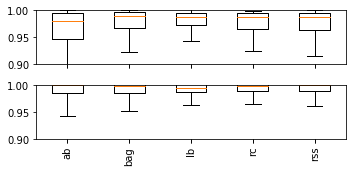

In [16]:
boxesInduction = []
boxesInference = []
legend = []
for ml in metalearners:
    dfAlgo = dfResults[dfResults["algorithm"] == ml]
    totInductionTime = dfAlgo["fittime"]
    totInferenceTime = dfAlgo["applicationtime"]
    subInductionTime = dfAlgo["sub_inductiontime"]
    subInferenceTime = dfAlgo["sub_inferencetime"]
    inductionIndex = (totInductionTime >= 10) & (totInductionTime + 5 >= subInductionTime)
    inferenceIndex = (totInferenceTime >= 10) & (totInferenceTime + 5 >= subInferenceTime)
    
    diffInduction = subInductionTime[inductionIndex] / totInductionTime[inductionIndex]
    diffInference = subInferenceTime[inferenceIndex] / totInferenceTime[inferenceIndex]
    
    boxesInduction.append(diffInduction)
    boxesInference.append(diffInference)
    legend.append(ml)

    
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(5, 2.5))
a = ax[0]
a.boxplot(boxesInduction, 0, "")
a.set_ylim([0.9, 1])
a = ax[1]
a.boxplot(boxesInference, 0, "")
a.set_xticklabels([algoshortcuts[a] for a in legend], rotation=90)
a.set_ylim([0.9, 1])
fig.tight_layout()
fig.savefig("plots/metalearners-ratio.pdf")
plt.show()

# 2. Check Prediction Quality of the "Formula"

In [17]:
dfResults.columns

Index(['experiment_id', 'openmlid', 'fitsize', 'numattributes',
       'applicationsize', 'algorithm', 'algorithmoptions', 'baselearner',
       'seed', 'copies', 'portion', 'sub_numinstances', 'sub_numattributes',
       'numberOfDistributionCalls_training',
       'numberOfDistributionSCalls_training',
       'numberOfClassifyInstanceCalls_training',
       'numberOfBuildClassifierCalls_training',
       'numberOfDistributionCalls_prediction',
       'numberOfDistributionSCalls_prediction',
       'numberOfClassifyInstanceCalls_prediction',
       'numberOfBuildClassifierCalls_prediction', 'traintime_training',
       'disttime_training', 'classifytime_training', 'traintime_prediction',
       'disttime_prediction', 'classifytime_prediction',
       'homogeneousmetafeatures', 'fittime', 'applicationtime',
       'sub_inductiontime', 'sub_inductiontimepercopy', 'sub_inferencetime',
       'sub_inferencetimepercopy', 'sub_inductions_training',
       'sub_inferences_training', 'sub_ind

In [18]:
dfResults["formulatime"] = dfResults["copies"] * (dfResults["sub_inductiontimepercopy"] + (dfResults["sub_inferences_training"] + dfResults["sub_inferences_prediction"]) * dfResults["sub_inferencetimepercopy"] / dfResults["sub_numinstances"])

3401
4639
1446
1005
7128


/home/felix/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


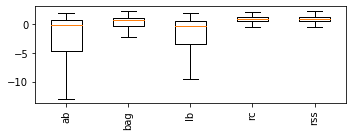

In [19]:
boxesPrediction = []
for ml in metalearners:
    dfAlgo = dfResults[dfResults["algorithm"] == ml]
    vals = (dfAlgo["fittime"] + dfAlgo["applicationtime"] - dfAlgo["formulatime"]).values
    boxesPrediction.append(vals)
    print(len(vals))
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
a = ax
a.boxplot(boxesPrediction, 0, "")
a.set_xticks(np.arange(len(metalearners)) + 1)
a.set_xticklabels([algoshortcuts[a] for a in metalearners], rotation=90)
fig.tight_layout()
fig.savefig("plots/metalearnerperformance.pdf")
fig.show()

### Combined Plot

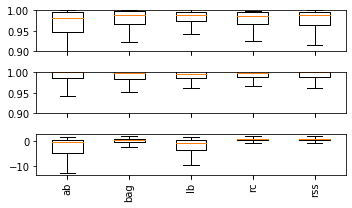

In [20]:
fig, ax = plt.subplots(3, 1, sharex=True, figsize=(5, 3))
a = ax[0]
a.boxplot(boxesInduction, 0, "")
a.set_ylim([0.9, 1])
a = ax[1]
a.boxplot(boxesInference, 0, "")
a.set_ylim([0.9, 1])
a = ax[2]
a.boxplot(boxesPrediction, 0, "")
a.set_xticklabels([algoshortcuts[a] for a in legend], rotation=90)
fig.tight_layout()
fig.savefig("plots/metalearners-combined.pdf")
plt.show()

# OLD STUFF

In [2]:
metaDF = pd.read_csv("data/runtimes_meta_default.csv")
datasets = pd.unique(metaDF["openmlid"])
trainpoints = pd.unique(metaDF["fitsize"])
seeds = pd.unique(metaDF["seed"])
metaDF

,experiment_id,openmlid,totalsize,fitsize,applicationsize,fitattributes,seed,algorithm,baselearner,fittime,applicationtime,exception
0,1,3,3196,100,3096,40.0,0,adaboostm1,weka.classifiers.bayes.BayesNet,1.0,1.0,NaN
1,2,3,3196,100,3096,40.0,0,adaboostm1,weka.classifiers.trees.DecisionStump,1.0,1.0,NaN
2,6,3,3196,100,3096,40.0,0,adaboostm1,weka.classifiers.rules.DecisionTable,1.0,0.0,NaN
3,20,3,3196,100,3096,40.0,0,adaboostm1,weka.classifiers.lazy.IBk,1.0,1.0,NaN
4,37,3,3196,100,3096,40.0,0,adaboostm1,weka.classifiers.trees.J48,1.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
45737,65491,41064,58000,50000,8000,784.0,1,bagging,weka.classifiers.trees.REPTree,777.0,9.0,NaN
45738,65636,41064,58000,50000,8000,784.0,1,bagging,weka.classifiers.functions.VotedPerceptron,1258.0,895.0,NaN
45739,65682,41064,58000,50000,8000,784.0,1,bagging,weka.classifiers.rules.ZeroR,3.0,10.0,NaN
45740,43286,41064,58000,50000,8000,784.0,1,randomsubspace,weka.classifiers.trees.RandomTree,24.0,9.0,NaN


In [33]:
addDF[['experiment_id', 'openmlid', 'datapoints', 'seed', 'algorithm', 'baselearner', 'numberOfBuildClassifierCalls_training', 'numberOfDistributionCalls_training', 'numberOfDistributionSCalls_training', 'numberOfClassifyInstanceCalls_training', 'numberOfDistributionCalls_prediction', 'numberOfDistributionSCalls_prediction', 'numberOfClassifyInstanceCalls_prediction', 'numberOfBuildClassifierCalls_prediction']]
addDF.columns
#'numberOfDistributionCalls_training',       'numberOfDistributionSCalls_training',       'numberOfClassifyInstanceCalls_training',       'numberOfBuildClassifierCalls_training',       'numberOfMetafeatureComputationCalls_training'
addDF.query("algorithm == 'adaboostm1' and datapoints != numberOfDistributionCalls_training and numberOfDistributionCalls_training + numberOfDistributionSCalls_training + numberOfClassifyInstanceCalls_training > 0")[["baselearner", "openmlid", "datapoints", 'datasetMetafeatures']]

,baselearner,openmlid,datapoints,datasetMetafeatures
19,weka.classifiers.bayes.BayesNet,21,100,"{numnumericattributes=0, numinstances=100, num..."
30,weka.classifiers.bayes.BayesNet,21,100,"{numnumericattributes=0, numinstances=100, num..."
35,weka.classifiers.bayes.BayesNet,21,100,"{numnumericattributes=0, numinstances=100, num..."
37,weka.classifiers.bayes.BayesNet,21,100,"{numnumericattributes=0, numinstances=100, num..."
77,weka.classifiers.rules.DecisionTable,3,100,"{numnumericattributes=0, numinstances=100, num..."
...,...,...,...,...
149113,weka.classifiers.trees.RandomTree,40975,100,"{numnumericattributes=0, numinstances=100, num..."
149424,weka.classifiers.functions.SMO,40975,100,"{numnumericattributes=0, numinstances=100, num..."
149683,weka.classifiers.lazy.IBk,1146,1000,"{numnumericattributes=10936, numinstances=1000..."
149685,weka.classifiers.lazy.IBk,1146,1000,"{numnumericattributes=10936, numinstances=1000..."


## Verify meta features

In [110]:
import ast
addDF[["baselearner", "openmlid", "datapoints", 'datasetMetafeatures']]
mfInstances = []
mfAttributes = []
pbar = tqdm(total=len(addDF))
for i, row in addDF.iterrows():
    pbar.update(1)
    d = ast.literal_eval(row["datasetMetafeatures"].replace("=", "\": \"").replace(", ", "\", \"").replace("{", "{\"").replace("}", "\"}"))
    mfInstances.append(d["numinstances"])
    mfAttributes.append(d["numattributes"])
pbar.close()
addDF["mf_instances"] = mfInstances
addDF["mf_attributes"] = mfAttributes

In [111]:
addDF = addDF.astype({'mf_instances': 'int'})
addDF.query("datapoints != mf_instances")

,info_id,experiment_id,openmlid,datapoints,seed,baselearner,hashCodeOfBaselearner,numberOfDistributionCalls_training,numberOfDistributionSCalls_training,numberOfClassifyInstanceCalls_training,...,datasetMetafeatures,algorithm,traintime_training,disttime_training,classifytime_training,traintime_prediction,disttime_prediction,classifytime_prediction,mf_instances,mf_attributes


this is empty and, hence, confirms that the number of instances do not change ever

In [113]:
checkDF = addDF.merge(pd.read_csv("data/metafeatures.csv", delimiter=";"), left_on=["openmlid", "datapoints", "seed"], right_on=["openmlid", "datapoints_fold1", "seed"])[["experiment_id", "openmlid", "algorithm", "seed", "baselearner", "mf_attributes", "f1_numattributes"]]

In [118]:
checkDF = checkDF.dropna().astype({"f1_numattributes": int, "mf_attributes": int})
checkDF.query("mf_attributes != f1_numattributes")
print(len(checkDF.query("mf_attributes != f1_numattributes and algorithm != 'randomsubspace'")))
rssDF = checkDF.query("algorithm == 'randomsubspace'")
rssDF.query("mf_attributes  * 2 - f1_numattributes > 0 or f1_numattributes - 2 * mf_attributes > 0")

0


,experiment_id,openmlid,algorithm,seed,baselearner,mf_attributes,f1_numattributes
1125,2532,22,randomsubspace,0,weka.classifiers.trees.RandomTree,24,47
1126,2532,22,randomsubspace,0,weka.classifiers.trees.RandomTree,24,47
1127,2532,22,randomsubspace,0,weka.classifiers.trees.RandomTree,24,47
1128,2532,22,randomsubspace,0,weka.classifiers.trees.RandomTree,24,47
1129,2532,22,randomsubspace,0,weka.classifiers.trees.RandomTree,24,47
...,...,...,...,...,...,...,...
582275,41924,40685,randomsubspace,1,weka.classifiers.trees.RandomTree,5,9
582276,41924,40685,randomsubspace,1,weka.classifiers.trees.RandomTree,5,9
582277,41924,40685,randomsubspace,1,weka.classifiers.trees.RandomTree,5,9
582278,41924,40685,randomsubspace,1,weka.classifiers.trees.RandomTree,5,9


# Verify formula for meta-learner prediction time

## Verify close-0 self time for training and prediction of meta-learners

## Verify that no meta-learner calls the train-procedure at prediction time

In [7]:
print(len(addDF.query("numberOfBuildClassifierCalls_prediction > 0")))

0


## Verify that meta-features of Di do not depend on i and can be computed

* Computation of the numer of prediction invocations during training
*  Computation of the numer of prediction invocations during prediction
*  Computation of the number of instances (|Di|)
* Computation of the number of features.